This code is to draw figure 1 in the paper. 

In [1]:
#########Import library
%matplotlib inline
import os
import sys
sys.path.append('../') 
from libMapping_v13 import mapping  # <--- this is all you need to do diffusion processing
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from imgbasics import imcrop
from skimage.transform import resize as imresize
import h5py
import warnings #we know deprecation may show bc we are using a stable older ITK version
warnings.filterwarnings("ignore", category=DeprecationWarning)
defaultPath= r'C:\Research\MRI\MP_EPI'
plt.rcParams.update({'axes.titlesize': 'small'})
import matplotlib
from SimulationFunction import *
matplotlib.rcParams['savefig.dpi'] = 800
plot=True
CIRC_ID='CIRC_00446'
img_root_dir = os.path.join(defaultPath, "DataSet",CIRC_ID)
##Feb22#Save_imgs_2
saved_img_root_dir=os.path.join(defaultPath, "DataSet",CIRC_ID,"save_imgs_resize")

#saved_img_root_dir=os.path.join(defaultPath, "DataSet",CIRC_ID,"save_imgs")
if not os.path.exists(saved_img_root_dir):
            os.mkdir(saved_img_root_dir)

# image root directory
# Statas saved 

#Read the MP01-MP03
mapList=[]
for dirpath,dirs,files in  os.walk(img_root_dir):
    for x in files:
        path=os.path.join(dirpath,x)
        if path.endswith('.mapping'):
            if path.endswith('p.mapping')==False and path.endswith('m.mapping')==False:
                mapList.append(path)
print(mapList)
img_moco_dir='C:\Research\MRI\MP_EPI\Moco_Dec6\MOCO'
moco_data=h5py.File(os.path.join(img_moco_dir,rf'{CIRC_ID}_MOCO.mat'),'r')

does not have numba library ... slower calculations only
['C:\\Research\\MRI\\MP_EPI\\DataSet\\CIRC_00446\\MP01_Slice0.mapping', 'C:\\Research\\MRI\\MP_EPI\\DataSet\\CIRC_00446\\MP01_Slice1.mapping', 'C:\\Research\\MRI\\MP_EPI\\DataSet\\CIRC_00446\\MP01_Slice2.mapping', 'C:\\Research\\MRI\\MP_EPI\\DataSet\\CIRC_00446\\MP01_T1.mapping', 'C:\\Research\\MRI\\MP_EPI\\DataSet\\CIRC_00446\\MP02_T2.mapping', 'C:\\Research\\MRI\\MP_EPI\\DataSet\\CIRC_00446\\MP03_DWI.mapping', 'C:\\Research\\MRI\\MP_EPI\\DataSet\\CIRC_00446\\save_imgs\\CIRC_00446_MP01_T1_p_cropped.mapping', 'C:\\Research\\MRI\\MP_EPI\\DataSet\\CIRC_00446\\save_imgs\\CIRC_00446_MP02_T2_p_cropped.mapping', 'C:\\Research\\MRI\\MP_EPI\\DataSet\\CIRC_00446\\save_imgs\\CIRC_00446_MP03_DWI_p_cropped.mapping']


In [2]:
MP01_0=mapping(mapList[0])
MP01_1=mapping(mapList[1])
MP01_2=mapping(mapList[2])

MP01=mapping(mapList[-3])
MP02=mapping(mapList[-2])
MP03=mapping(mapList[-1])
MP01_list=[MP01_0,MP01_1,MP01_2]
MPs_list=[MP01,MP02,MP03]

for obj in MPs_list:
    obj._data=np.copy(obj._raw_data)
for obj in MP01_list:
    obj._data=np.copy(obj._raw_data)
#Get the shape of all data, and then replace the data with corrected
#Read the data
#Renew the dataset:
for ss,obj_T1 in enumerate(MP01_list):
    key=f'moco_Slice{ss}'
    moco_data_single_slice=np.transpose(moco_data[key],(2,1,0))
    Ndtmp=0
    for obj in MPs_list:
        if 'mp01' in obj.ID.lower():
            Ndtmp_end=np.shape(MP01_list[ss]._data)[-1]
            obj_T1._update_data(moco_data_single_slice[:,:,np.newaxis,0:Ndtmp_end])
            #obj_T1.go_crop_Auto()
            #obj_T1.imshow_corrected(ID=f'MP01_Slice{ss}_1_Cropped',plot=plot,path=saved_img_root_dir)
            #obj_T1.go_create_GIF(path_dir=str(saved_img_root_dir))
            #obj_T1._update_data(moco_data_single_slice[:,:,0:Ndtmp_end])
            print(obj_T1.ID,np.shape(obj_T1._data))
            print('valueList=',obj_T1.valueList)
        else:
            Ndtmp_start=Ndtmp_end
            Ndtmp_end+=np.shape(obj._data)[-1]
            obj._data[:,:,ss,:]=moco_data_single_slice[:,:,Ndtmp_start:Ndtmp_end]
            print(obj.ID,np.shape(moco_data_single_slice[:,:,Ndtmp_start:Ndtmp_end]))
            #print('valueList=',obj.valueList)
MP02_p=mapping(mapList[-2])
MP01=mapping(mapList[-3])
MP02=mapping(mapList[-2])
MP03=mapping(mapList[-1])
#Read the contour to others
#Read the mask
cropzone=MP02_p.cropzone
temp=np.shape(MP02_p._data)
shape=(temp[0], temp[1], MP02_p.shape[2])
mask_lv_crop=np.zeros(shape)
mask_endo_crop=np.zeros(shape)
mask_epi_crop=np.zeros(shape)
CoM_crop=np.zeros(shape)
for z in range(MP02_p.Nz):
    mask_lv_crop[:,:,z] = MP02_p.mask_lv[:,:,z]
    mask_endo_crop[:,:,z] = MP02_p.mask_endo[:,:,z]
    mask_epi_crop[:,:,z]= MP02_p.mask_epi[:,:,z]
    #CoM_crop=imcrop(MP02_p.CoM[:,:,z], cropzone)
  
#Draw the overlay before and after moco
#Before the moco: use _raw_data
#Only needs the first slice:
import copy
MP01_p=copy.copy(MP01)
MP02_p=copy.copy(MP02)
MP03_p=copy.copy(MP03)

fileList=MP01_list
for obj in fileList:
    obj.cropzone=cropzone
    obj.go_crop()
    obj.go_resize()

Loading in CIRC mapping object
Successfully loaded in diffusion data!!
Loading in CIRC mapping object
Successfully loaded in diffusion data!!
Loading in CIRC mapping object
Successfully loaded in diffusion data!!
Loading in CIRC mapping object
Successfully loaded in diffusion data!!
Loading in CIRC mapping object
Successfully loaded in diffusion data!!
Loading in CIRC mapping object
Successfully loaded in diffusion data!!
MP01_Slice0 (48, 128, 1, 16)
valueList= [110.0, 190.0, 240.0, 320.0, 440.0, 840.0, 940.0, 1240.0, 1540.0, 2140.0, 2220.0, 2740.0, 2740.0, 2820.0, 5140.0, 8040.0]
MP02_T2 (48, 128, 8)
MP03_DWI (48, 128, 15)
MP01_Slice1 (48, 128, 1, 17)
valueList= [110.0, 190.0, 240.0, 320.0, 840.0, 940.0, 1240.0, 1540.0, 1540.0, 2140.0, 2740.0, 3140.0, 3140.0, 4140.0, 5140.0, 6140.0, 8040.0]
MP02_T2 (48, 128, 8)
MP03_DWI (48, 128, 15)
MP01_Slice2 (48, 128, 1, 17)
valueList= [110.0, 190.0, 240.0, 320.0, 440.0, 440.0, 840.0, 940.0, 1240.0, 1540.0, 2740.0, 2740.0, 2820.0, 4140.0, 5140.0, 

  0%|          | 0/1 [00:00<?, ?it/s]

Resizing of data:


  0%|          | 0/1 [00:00<?, ?it/s]

Cropping of data:


  0%|          | 0/1 [00:00<?, ?it/s]

Resizing of data:


  0%|          | 0/1 [00:00<?, ?it/s]

Cropping of data:


  0%|          | 0/1 [00:00<?, ?it/s]

Resizing of data:


  0%|          | 0/1 [00:00<?, ?it/s]

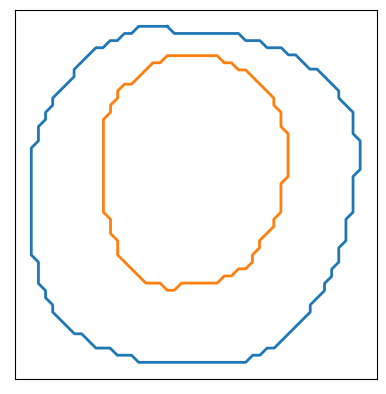

C:\Users\MAID2\AppData\Local\Temp\ipykernel_18940\4010453277.py:48: UserWarning: No contour levels were found within the data range.
  axs[z,d].contour(masked_mask, colors='red')
C:\Users\MAID2\AppData\Local\Temp\ipykernel_18940\4010453277.py:48: UserWarning: No contour levels were found within the data range.
  axs[z,d].contour(masked_mask, colors='red')
C:\Users\MAID2\AppData\Local\Temp\ipykernel_18940\4010453277.py:48: UserWarning: No contour levels were found within the data range.
  axs[z,d].contour(masked_mask, colors='red')
C:\Users\MAID2\AppData\Local\Temp\ipykernel_18940\4010453277.py:48: UserWarning: No contour levels were found within the data range.
  axs[z,d].contour(masked_mask, colors='red')
C:\Users\MAID2\AppData\Local\Temp\ipykernel_18940\4010453277.py:48: UserWarning: No contour levels were found within the data range.
  axs[z,d].contour(masked_mask, colors='red')
C:\Users\MAID2\AppData\Local\Temp\ipykernel_18940\4010453277.py:48: UserWarning: No contour levels were f

: 

: 

In [4]:
import cv2 as cv

image=mask_lv_crop[:,:,0]*255-1
img=np.float16(image)
from skimage import measure
contours = measure.find_contours(img, 240)

# Display the image and plot all contours found
fig, ax = plt.subplots()
#ax.imshow(img, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()
raw_volume=np.zeros((temp[0], temp[1],3, 6))
#MP01:
raw_volume[:,:,0,:]=MP01_0._data[:,:,0,[0,4,7,10,12,14]]
raw_volume[:,:,1,:]=MP02._data[:,:,0,[0,2,3,4,6,7]]
raw_volume[:,:,2,:]=MP03._data[:,:,0,range(6)]

Nx,Ny,Nz,Nd=np.shape(raw_volume)
#Feb22
plt.style.use('dark_background')
#plt.style.use('dark_background')
cmap='gray'
valueList1=[MP01_0.valueList[i] for i in [0,4,7,10,12,14]]
valueList2=[MP02.valueList[i] for i in [0,2,3,4,6,7]]
valueList3=['50x','50y','50z','500x','500y','500z']
valueList=[valueList1,valueList2,valueList3]

#%%
#mask_lv_crop_tmp=mask_lv_crop[:,:,0]*255
#mask_lv_crop_tmp = np.array(mask_lv_crop[:,:,0], np.uint8)
#cnts = cv2.findContours(mask_lv_crop_tmp[..., 0], mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
#%%
fig,axs=plt.subplots(Nz,Nd, figsize=(Nd*3.3,Nz*3),constrained_layout=True)            
for d in range(Nd):
    for z in range(Nz):
        vmin = np.min(raw_volume[:,:,z,:])
        vmax = np.max(raw_volume[:,:,z,:])
        #alpha = mask_lv_crop[..., 0] * 1.0
        axs[z,d].imshow(raw_volume[:,:,z,d],cmap=cmap,vmin=vmin,vmax=vmax)
        masked_mask = np.ma.masked_where(mask_lv_crop[..., 0] == 1, mask_lv_crop[..., 0])
        axs[z,d].contour(masked_mask, colors='red') 
        
        #axs[z,d].imshow(canvas)
        #axs[z,d].imshow(mask_epi_crop[:,:,0])
        #axs[z,d].imshow(mask_endo_crop[:,:,0])
        axs[z,d].set_title(f'{valueList[z][d]}',fontsize='small')
        axs[z,d].axis('off')
        for contour in contours:
            axs[z,d].plot(contour[:, 1], contour[:, 0], linewidth=0.3)
#root_dir=r'C:\Research\MRI\MP_EPI\saved_ims'
img_dir= os.path.join(saved_img_root_dir,f'Mosaic')
if plot:
    plt.savefig(img_dir, bbox_inches='tight')
    plt.savefig(img_dir+'.pdf',bbox_inches='tight')
    plt.savefig(os.path.join(os.path.dirname(img_root_dir),'Figure1','Mosaic_Slice0'))

plt.show()

#img_dir= os.path.join(saved_img_root_dir,f'Mosaic_contour')


In [3]:
for z in range(3):
    fig,axs=plt.subplots(1,Nd, figsize=(Nd*3.3,Nz*3),constrained_layout=True)            
    for d in range(Nd):
        
            vmin = np.min(raw_volume[:,:,z,:])
            vmax = np.max(raw_volume[:,:,z,:])
            #alpha = mask_lv_crop[..., 0] * 1.0
            axs[d].imshow(raw_volume[:,:,z,d],cmap=cmap,vmin=vmin,vmax=vmax)
            #masked_mask = np.ma.masked_where(mask_lv_crop[..., 0] == 1, mask_lv_crop[..., 0])
            #axs[d].contour(masked_mask, colors='red') 
            
            #axs[z,d].imshow(canvas)
            #axs[z,d].imshow(mask_epi_crop[:,:,0])
            #axs[z,d].imshow(mask_endo_crop[:,:,0])
            #axs[d].set_title(f'{valueList[z][d]}',fontsize='small')
            axs[d].axis('off')
            #for contour in contours:
            #    axs[d].plot(contour[:, 1], contour[:, 0], linewidth=0.3)

    #root_dir=r'C:\Research\MRI\MP_EPI\saved_ims'
    img_dir= os.path.join(saved_img_root_dir,f'Mosaic{z}')
    #img_dir= os.path.join(saved_img_root_dir,f'Mosaic_contour')

    if plot:
        plt.savefig(img_dir, bbox_inches='tight')
        plt.savefig(img_dir+'.pdf',bbox_inches='tight')
        plt.savefig(os.path.join(os.path.dirname(img_root_dir),'Figure1',f'Mosaic_Slice0_{z}'))

    plt.show()

NameError: name 'Nd' is not defined

NameError: name 'raw_volume' is not defined

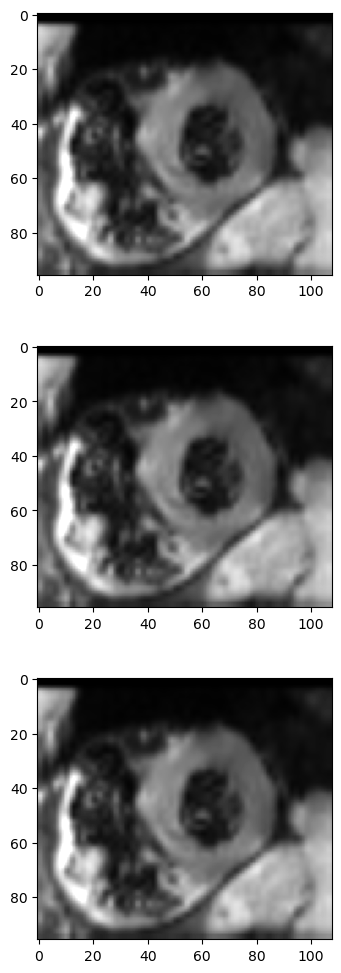

In [4]:
plt.style.use('default')
fig,axs=plt.subplots(3,1, figsize=(1*3.3,3.3*3),constrained_layout=True) 
#alpha = mask_lv_crop[..., 0] * 1.0
base_im_tmp=np.array([MP02_p._data[:, :, 0, 0],MP03_p._data[:, :, 0, 0]])
base_im = np.mean(base_im_tmp,axis=0)
brightness = 0.8
#alpha = 1.0*MP02_p.mask_lv[..., 0]
axs[0].imshow(base_im, cmap="gray", vmax=np.max(base_im)*brightness)
axs[1].imshow(base_im, cmap="gray", vmax=np.max(base_im)*brightness)
axs[2].imshow(base_im, cmap="gray", vmax=np.max(base_im)*brightness)
im1=axs[0].imshow(raw_volume[:,:,0],cmap='magma',vmin=0,vmax=3000, alpha=1.0*MP02_p.mask_lv[..., 0])
im2=axs[1].imshow(raw_volume[:,:,1],cmap='viridis',vmin=0,vmax=150, alpha=1.0*MP02_p.mask_lv[..., 0])
im3=axs[2].imshow(raw_volume[:,:,2],cmap='hot',vmin=0,vmax=3, alpha=1.0*MP02_p.mask_lv[..., 0])
#bar1=fig.colorbar(im1, ax=axs[0], shrink=0.7, pad=0.018, aspect=11)
#bar2=fig.colorbar(im2, ax=axs[1], shrink=0.7, pad=0.018, aspect=11)
#bar3=fig.colorbar(im3, ax=axs[2], shrink=0.7, pad=0.018, aspect=11)
#axs[z,d].imshow(canvas)
#axs[z,d].imshow(mask_epi_crop[:,:,0])
#axs[z,d].imshow(mask_endo_crop[:,:,0])
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')


img_dir= os.path.join(saved_img_root_dir,f'Maps_Slice0_overlay')
if plot:
    plt.savefig(img_dir, bbox_inches='tight')
    plt.savefig(img_dir+'.pdf',bbox_inches='tight')
    plt.savefig(os.path.join(os.path.dirname(img_root_dir),'Figure1','Maps_Slice0_overlay'))

plt.show()                        

Over here, we can plot the maps

Plot the line of T1/T2/ADC maps

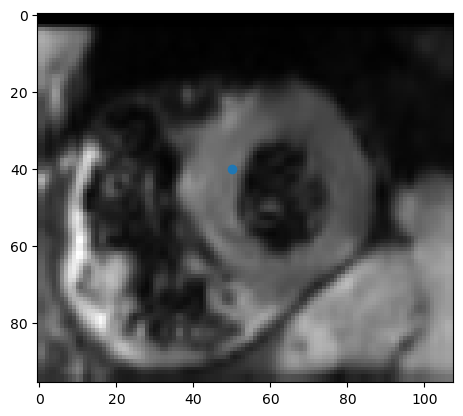

[110.0, 190.0, 240.0, 320.0, 440.0, 840.0, 940.0, 1240.0, 1540.0, 2140.0, 2220.0, 2740.0, 2740.0, 2820.0, 5140.0] : [1019.98176815  918.03158887  786.97267063  766.25008028  581.21245975
  122.4146701   166.17603842  361.88556655  475.51876977  799.53584857
  763.00568725  995.73558709  925.58245806 1018.68634254 1332.35244109]


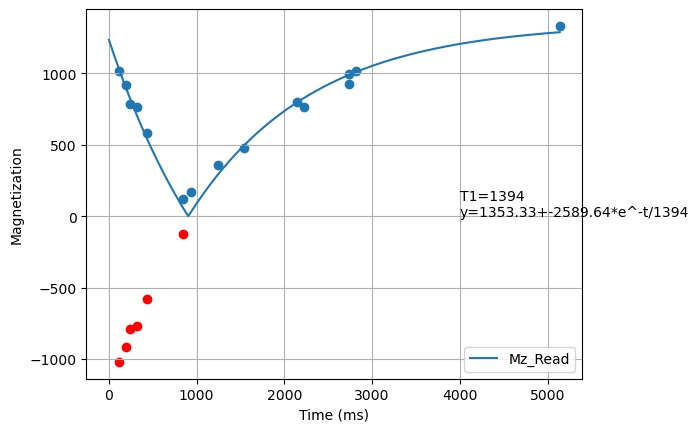

In [5]:
from libMapping_v13 import *
from SimulationFunction import *
plt.style.use('default')
def ir_fit(data=None,TIlist=None,ra=500,rb=-1000,T1=600,type='WLS',error='l2',Niter=2,searchtype='grid',
            T1bound=[1,5000],invertPoint=4):
    aEstTmps=[]
    bEstTmps=[]
    T1EstTmps=[]
    resTmps=[]
    #Make sure the data come in increasing TI-order
    #index = np.argsort(TIlist)
    #ydata=np.squeeze(data[index])
    #Initialize variables:
    minIndTmps=[]
    minInd=np.argmin(data)
    '''if minInd==0:
        minInd=1
    elif minInd==len(TIlist):
        minInd=len(TIlist)-1'''
    #Invert the data to 2x*before,at, 2x*after the min
    invertPoint==None
    if invertPoint==None:
        iterNum=0,2
    else:
        iterNum=1-int(invertPoint/2),1+int(invertPoint/2)+1

    for ii in range(iterNum[0],iterNum[1],1):
        try:
            minIndTmp=minInd+int(ii)
            invertMatrix=np.concatenate((-np.ones(minIndTmp),np.ones(len(TIlist)-minIndTmp)),axis=0)
            dataTmp=data*invertMatrix.T
            minIndTmps.append(minIndTmp)
        except:
            continue

        if searchtype == 'lm':
            try: 
                T1_exp,ra_exp,rb_exp,res,ydata_exp=sub_ir_fit_lm(data=dataTmp,TIlist=TIlist,
                ra=ra,rb=rb,T1=T1,type=type,error=error,Niter=Niter)
                aEstTmps.append(ra_exp)
                bEstTmps.append(rb_exp)
                T1EstTmps.append(T1_exp)
                #Get the chisquare
                resTmps.append(res)
            except:
                T1_exp,ra_exp,rb_exp,res,ydata_exp=sub_ir_fit_grid(data=dataTmp,TIlist=TIlist,T1bound=T1bound)
                aEstTmps.append(ra_exp)
                bEstTmps.append(rb_exp)
                T1EstTmps.append(T1_exp)
                #Get the chisquare
                resTmps.append(res)
        elif searchtype== 'grid':
            T1_exp,ra_exp,rb_exp,res,ydata_exp=sub_ir_fit_grid(data=dataTmp,TIlist=TIlist,T1bound=T1bound)
            aEstTmps.append(ra_exp)
            bEstTmps.append(rb_exp)
            T1EstTmps.append(T1_exp)
            #Get the chisquare
            resTmps.append(res)
    returnInd = np.argmin(np.array(resTmps))
    T1_final=T1EstTmps[returnInd]
    ra_final=aEstTmps[returnInd]
    rb_final=bEstTmps[returnInd]
    #ydata_exp=ir_recovery(TIlist,T1,ra,rb)
    return T1_final,ra_final,rb_final,resTmps,minIndTmps[returnInd]

%matplotlib inline
pltDot=np.array([40,50])
base_im_tmp=np.array([MP02_p._data[:, :, 0, 0],MP03_p._data[:, :, 0, 0]])
base_im = np.mean(base_im_tmp,axis=0)
plt.imshow(base_im,cmap='gray')
plt.scatter(x=pltDot[1],y=pltDot[0])
plt.show()


###Finally we plot one line data and plot as a xyz
T1_line=MP01_0._data[pltDot[0],pltDot[1],0,:]   #First
T1_line=np.delete(T1_line,-1)

TIlist=np.array(MP01_0.valueList)
TIlist=np.delete(TIlist,-1).tolist()
print(TIlist,':',T1_line)
T1_final_grid,ra_final_grid,rb_final_grid,_,returnInd=ir_fit(abs(T1_line),TIlist,searchtype='grid',T1bound=[1,5000])

x_plot=np.arange(start=1,stop=TIlist[-1],step=1)
ydata_exp=abs(ir_recovery(x_plot,T1_final_grid,ra_final_grid,rb_final_grid))
plt.plot(x_plot,ydata_exp)

plt.scatter(np.array(TIlist[0:returnInd]),-1*np.abs(T1_line[0:returnInd]),color='r')
plt.scatter(np.array(TIlist),np.abs(T1_line))

plt.legend(['Mz_Read'])
plt.xlabel('Time (ms)')
plt.ylabel('Magnetization')
#plt.title(f'Simulation T1={T1} SNR={SNR}')
#plt.axis(xmin=np.min(T1_line),xmax=np.max(T1_line),ymin=-1,ymax=1)
plt.text(x=4000,y=0,s=f'T1={int(T1_final_grid)}\ny={ra_final_grid:.02f}+{rb_final_grid:.02f}*e^-t/{int(T1_final_grid)}')
plt.grid('True')
plt.show()
plt.close()





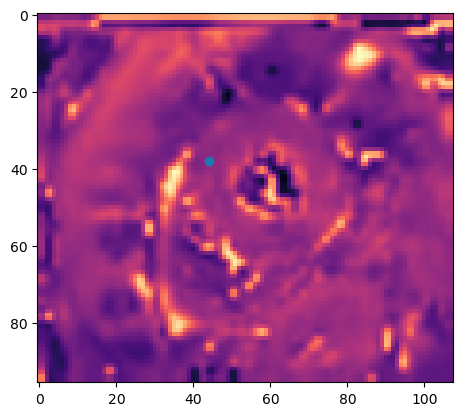

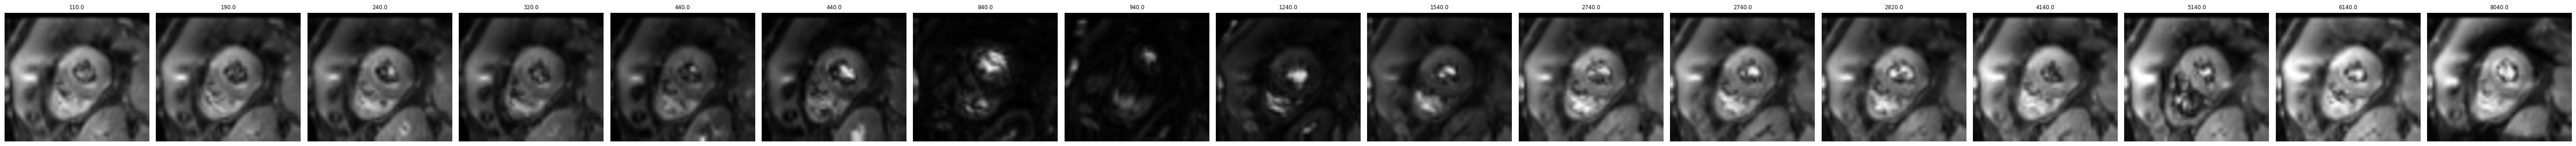

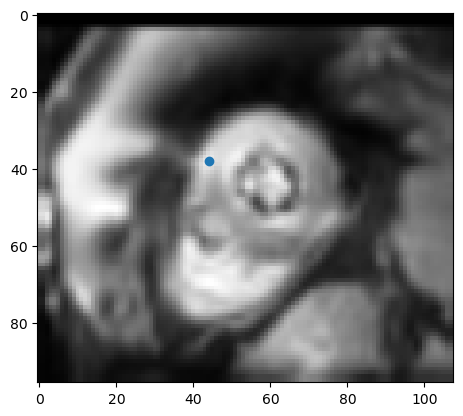

[110.0, 190.0, 240.0, 320.0, 440.0, 440.0, 840.0, 940.0, 1240.0, 1540.0, 2740.0, 2820.0, 4140.0, 5140.0, 6140.0] : [2896.87488502 2754.06616924 2438.53713583 1854.49525039 1290.34242032
 1059.89512536  191.75212879  274.63820113  917.44126465 1334.8520147
 2998.06912332 2828.21947762 3210.73772265 2730.2462905  3960.59321651]


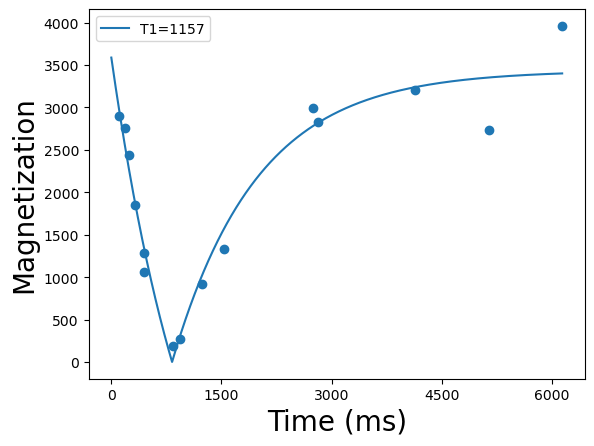

In [6]:

#%%

zz=2
%matplotlib inline
pltDot=np.array([38,44])
plt.imshow(MP01._map[:,:,zz],cmap='magma',vmin=0,vmax=3000)
plt.scatter(x=pltDot[1],y=pltDot[0])
plt.show()

#%%
%matplotlib inline
mapT1=MP01_list[zz]
Nd=MP01_1.Nd
fig,axs=plt.subplots(1,Nd, figsize=(Nd*3.3,1*3),constrained_layout=True)            
for d in range(Nd):

        vmin = np.min(mapT1._data[:,:,0,:])
        vmax = np.max(mapT1._data[:,:,0,:])
        #alpha = mask_lv_crop[..., 0] * 1.0
        axs[d].imshow(mapT1._data[:,:,0,d],cmap='gray',vmin=vmin,vmax=vmax)
        #masked_mask = np.ma.masked_where(mask_lv_crop[..., 0] == 1, mask_lv_crop[..., 0])
        #axs[1,d].contour(masked_mask, colors='red') 
        
        #axs[z,d].imshow(canvas)
        #axs[z,d].imshow(mask_epi_crop[:,:,0])
        #axs[z,d].imshow(mask_endo_crop[:,:,0])
        axs[d].set_title(f'{mapT1.valueList[d]}',fontsize='small')
        axs[d].axis('off')
plt.show()
#Slice1

base_im_tmp=np.array([MP02_p._data[:, :, zz, 0],MP02_p._data[:, :, zz, 2]])
base_im = np.mean(base_im_tmp,axis=0)
plt.imshow(base_im,cmap='gray')
plt.scatter(x=pltDot[1],y=pltDot[0])
plt.show()


###Finally we plot one line data and plot as a xyz
T1_line=mapT1._data[pltDot[0],pltDot[1],0,:]   #First
T1_line=np.delete(T1_line,[-1,-6])
#T1_line=np.delete(T1_line,[-1])
TIlist=np.array(mapT1.valueList)
TIlist=np.delete(TIlist,[-1,-6]).tolist()
#TIlist=np.delete(TIlist,[-1]).tolist()
print(TIlist,':',T1_line)
T1_final_grid,ra_final_grid,rb_final_grid,_,returnInd=ir_fit(abs(T1_line),TIlist,searchtype='grid',T1bound=[1,5000])

x_plot=np.arange(start=1,stop=TIlist[-1],step=1)
ydata_exp=abs(ir_recovery(x_plot,T1_final_grid,ra_final_grid,rb_final_grid))
plt.plot(x_plot,ydata_exp)

#plt.scatter(np.array(TIlist[0:returnInd]),-1*np.abs(T1_line[0:returnInd]),color='r')
plt.scatter(np.array(TIlist),np.abs(T1_line))
plt.legend([f'T1={int(T1_final_grid)}'])
plt.xlabel('Time (ms)',fontsize=20)
plt.ylabel('Magnetization',fontsize=20)
#plt.title(f'Simulation T1={T1} SNR={SNR}')
#plt.axis(xmin=np.min(T1_line),xmax=np.max(T1_line),ymin=-1,ymax=1)
#plt.text(x=4000,y=0,s=f'T1={int(T1_final_grid)}\ny={ra_final_grid:.02f}+{rb_final_grid:.02f}*e^-t/{int(T1_final_grid)}\nT1_map={mapT1._map[pltDot[0],pltDot[1],zz]}')
#print(f'1={int(T1_final_grid)}\ny={ra_final_grid:.02f}+{rb_final_grid:.02f}*e^-t/{int(T1_final_grid)}')
#print(f'T1_map={MP01._map[pltDot[0],pltDot[1],zz]}')
#plt.grid('True')
plt.xticks(np.arange(0, 6001, 1500)) 
plt.show()
plt.close()

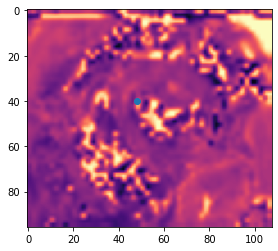

30


In [24]:
zz=1
%matplotlib inline
pltDot=np.array([40,48])
plt.imshow(MP01._map[:,:,zz],cmap='magma',vmin=0,vmax=3000)
plt.scatter(x=pltDot[1],y=pltDot[0])
plt.show()
print(MP01.Nd)

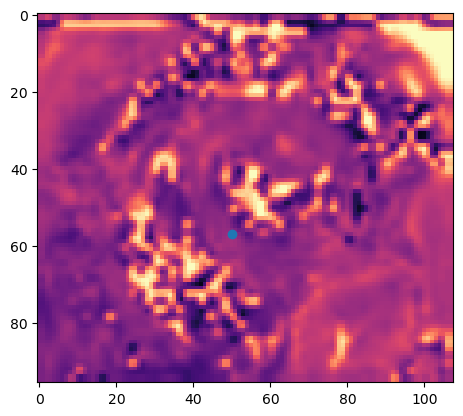

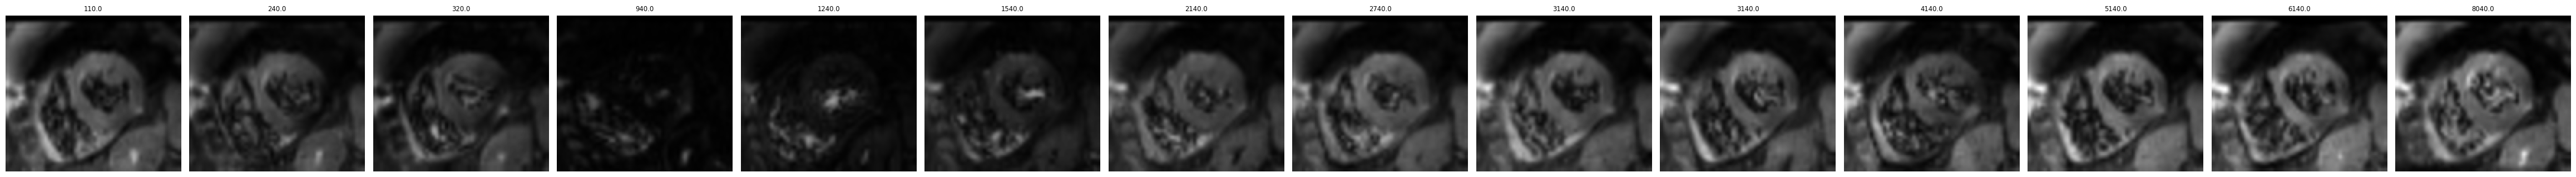

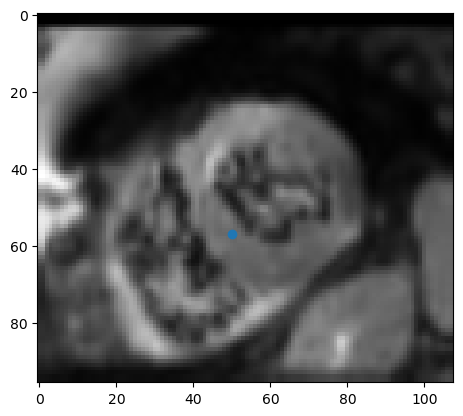

[110.0, 240.0, 320.0, 940.0, 1240.0, 1540.0, 2140.0, 2740.0, 3140.0, 4140.0, 5140.0, 6140.0] : [1197.81285293 1096.12507433  853.60442097   85.44830407  626.91259486
  612.34767535 1107.06323787 1373.53459885 1361.98789992 1106.46768908
 1749.22801183 1927.17676755]


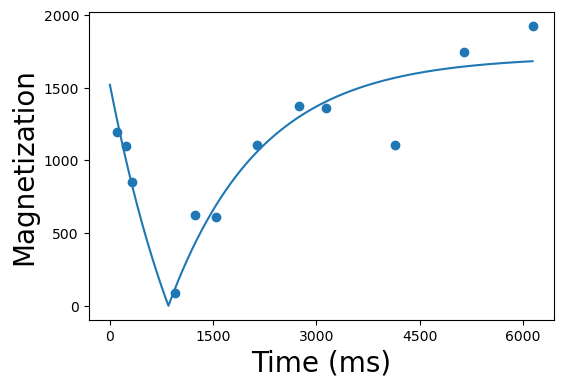

In [20]:
#%%  remove the Null point how it goes
import copy
plt.style.use('default')
zz=1
%matplotlib inline
pltDot=np.array([57,50])
plt.imshow(MP01._map[:,:,zz],cmap='magma',vmin=0,vmax=3000)
plt.scatter(x=pltDot[1],y=pltDot[0])
plt.show()

#import seaborn as sns
#sns.set_theme()
#%%
%matplotlib inline
mapT1=copy.copy(MP01_list[zz])
mapT1._delete(d=[1,4,7])
Nd=mapT1.Nd
fig,axs=plt.subplots(1,Nd, figsize=(Nd*3.3,1*3),constrained_layout=True)            
for d in range(Nd):

        vmin = np.min(mapT1._data[:,:,0,:])
        vmax = np.max(mapT1._data[:,:,0,:])
        #alpha = mask_lv_crop[..., 0] * 1.0
        axs[d].imshow(mapT1._data[:,:,0,d],cmap='gray',vmin=vmin,vmax=vmax)
        #masked_mask = np.ma.masked_where(mask_lv_crop[..., 0] == 1, mask_lv_crop[..., 0])
        #axs[1,d].contour(masked_mask, colors='red') 
        
        #axs[z,d].imshow(canvas)
        #axs[z,d].imshow(mask_epi_crop[:,:,0])
        #axs[z,d].imshow(mask_endo_crop[:,:,0])
        axs[d].set_title(f'{mapT1.valueList[d]}',fontsize='small')
        axs[d].axis('off')
plt.show()
#Slice1

base_im_tmp=np.array([MP02_p._data[:, :, zz, 0],MP02_p._data[:, :, zz, 2]])
base_im = np.mean(base_im_tmp,axis=0)
plt.imshow(base_im,cmap='gray')
plt.scatter(x=pltDot[1],y=pltDot[0])
plt.show()


###Finally we plot one line data and plot as a xyz
T1_line=mapT1._data[pltDot[0],pltDot[1],0,:]   #First
T1_line=np.delete(T1_line,[-1,-6])
#T1_line=np.delete(T1_line,[-1])
TIlist=np.array(mapT1.valueList)
TIlist=np.delete(TIlist,[-1,-6]).tolist()
#TIlist=np.delete(TIlist,[-1]).tolist()
print(TIlist,':',T1_line)
T1_final_grid,ra_final_grid,rb_final_grid,_,returnInd=ir_fit(abs(T1_line),TIlist,searchtype='grid',T1bound=[1,5000])

x_plot=np.arange(start=1,stop=TIlist[-1],step=1)
ydata_exp=abs(ir_recovery(x_plot,T1_final_grid,ra_final_grid,rb_final_grid))
plt.figure(figsize=(6,4))
plt.plot(x_plot,ydata_exp)

#plt.scatter(np.array(TIlist[0:returnInd]),-1*np.abs(T1_line[0:returnInd]),color='r')
plt.scatter(np.array(TIlist),np.abs(T1_line))
#plt.legend([f'T1={int(T1_final_grid)}'])
plt.xlabel('Time (ms)',fontsize=20)
plt.ylabel('Magnetization',fontsize=20)
plt.xticks(np.arange(0, 6001, 1500)) 
plt.yticks(np.arange(0, 2001, 500)) 
plt.savefig(os.path.join(os.path.dirname(img_root_dir),'Figure1','MP01_singlepoint'))
plt.show()
plt.close()

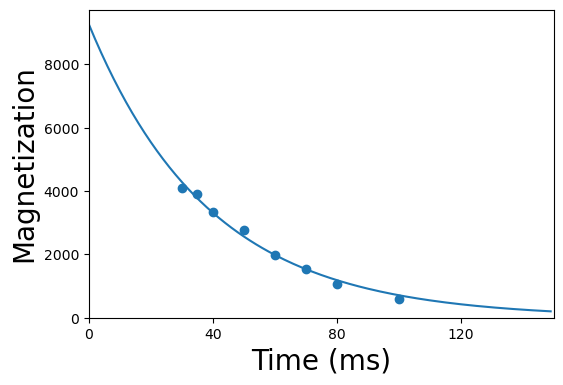

In [18]:

zz=2
%matplotlib inline
pltDot=np.array([38,44])

#%%
T2_line=MP02._data[pltDot[0],pltDot[1],2,:]
T2list=MP02.valueList
T2_exp,Mz_exp,res,ydata_exp=sub_mono_t2_fit_exp(T2_line,T2list)
T2=MP02._map[pltDot[0],pltDot[1],zz]
start=0
stop=150
x_plot=np.arange(start=start,stop=stop,step=1)
ydata_exp=abs(T2_recovery(x_plot,T2_exp,Mz_exp))*np.max(T2_line)
plt.figure(figsize=(6,4))
plt.plot(x_plot,ydata_exp)

#plt.scatter(np.array(TIlist[0:returnInd]),-1*np.abs(TI_read[2,:][0:returnInd]),color='r')
plt.scatter(np.array(T2list),T2_line)
#plt.legend([f'T2={T2_exp:.01f}'])
#plt.title(f'Simulation T2={T2}')
plt.axis(xmin=0,xmax=stop,ymin=0)
#plt.text(x=8000,y=0.5,s=f'T2={int(T2_exp)}\ny={Mz_exp:.02f}*e^-t/{T2_exp:.01f}')
#plt.grid('True')
plt.xlabel('Time (ms)',fontsize=20)
plt.ylabel('Magnetization',fontsize=20)
plt.xticks(np.arange(0, 141, 40)) 
plt.yticks(np.arange(0, 8001, 2000)) 
plt.savefig(os.path.join(os.path.dirname(img_root_dir),'Figure1','MP02_singlepoint'))

plt.show()
plt.close()

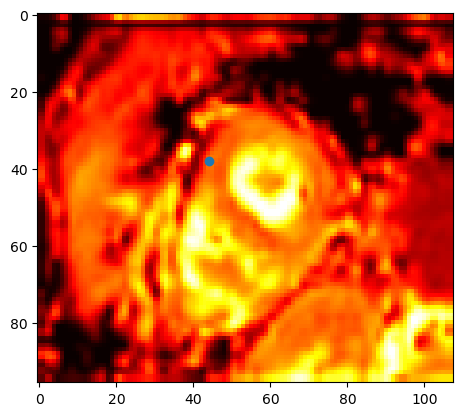

The b500 index: [ 3  6  9 12]
The b500 index: [ 4  7 10 13]
The b500 index: [ 5  8 11 14]


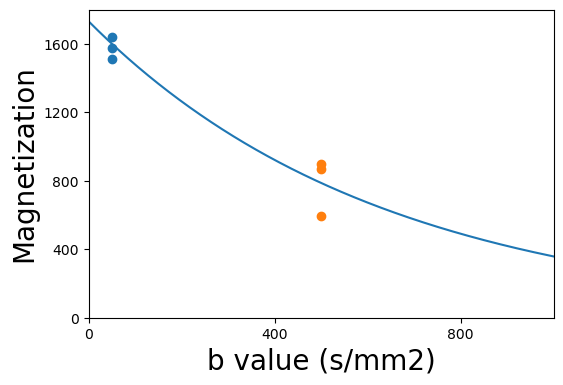

In [17]:

zz=2
%matplotlib inline
pltDot=np.array([38,44])
plt.imshow(MP03._map[:,:,zz],cmap='hot',vmin=0,vmax=3)
plt.scatter(x=pltDot[1],y=pltDot[0])
plt.show()
#%%
Nd=MP03.Nd
adc_val=MP03._map[pltDot[0],pltDot[1],zz]
ADC_line=MP03._data[pltDot[0],pltDot[1],zz,:]
Nbval=np.shape(MP03.bval[MP03.bval==50])[0]
S50=np.zeros(Nbval)
S500=np.zeros(Nbval)
ADC_temp=np.zeros(Nbval)
for j in range(Nbval):
    S50[j]=ADC_line[j]
    ind=np.arange(j,Nd,Nbval)[1::]
    print('The b500 index:',ind)
    #Go through all the b500
    #Averaging all b500
    S500[j]=np.mean(ADC_line[ind])
ADC_temp=-1/450 * np.log(S500/S50)
ADCmap=np.mean(ADC_temp)    #/1000

S_b0=np.mean(S500)/np.exp(-500*ADCmap)
def ADC_exp(b,adc,M0):
    return M0*np.exp(-b*adc)



ADC=ADCmap*1000    #*1000
start=0
stop=1000
x_plot=np.arange(start=start,stop=stop,step=0.1)
ydata_exp=abs(ADC_exp(x_plot,ADCmap,S_b0))
plt.figure(figsize=(6,4))
plt.plot(x_plot,ydata_exp)

#plt.scatter(np.array(TIlist[0:returnInd]),-1*np.abs(TI_read[2,:][0:returnInd]),color='r')

plt.scatter(np.repeat(50.0,len(S50)),S50)
plt.scatter(np.repeat(500.0,len(S500)),S500)
#plt.legend([f'ADC={ADC:.02f}'])
plt.xlabel('b value (s/mm2)',fontsize=20)
plt.ylabel('Magnetization',fontsize=20)
#plt.title(f'Simulation T2={adc_val}')
plt.axis(xmin=0,xmax=stop,ymin=0)
plt.xticks(np.arange(0, 1001, 400)) 
plt.yticks(np.arange(0, 1601, 400)) 
#plt.text(x=8000,y=0.5,s=f'T2={int(T2_exp)}\ny={Mz_exp:.02f}*e^-t/{T2_exp:.01f}')
#plt.grid('True')
plt.savefig(os.path.join(os.path.dirname(img_root_dir),'Figure1','MP03_singlepoint'))
plt.show()
plt.close()